<a href="https://colab.research.google.com/github/Nagasrineelamshetty/AIML/blob/main/AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent(Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [22]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [23]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [24]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [25]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

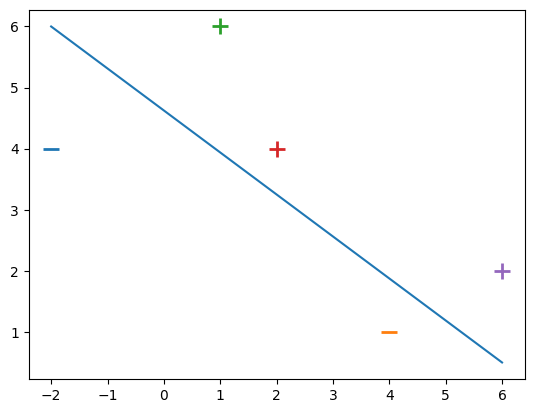

In [26]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

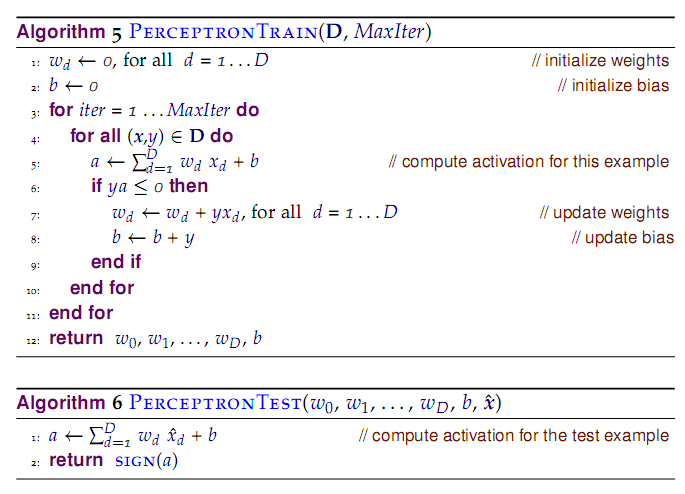

The algorithm is shown in the above image.

In [27]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [28]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

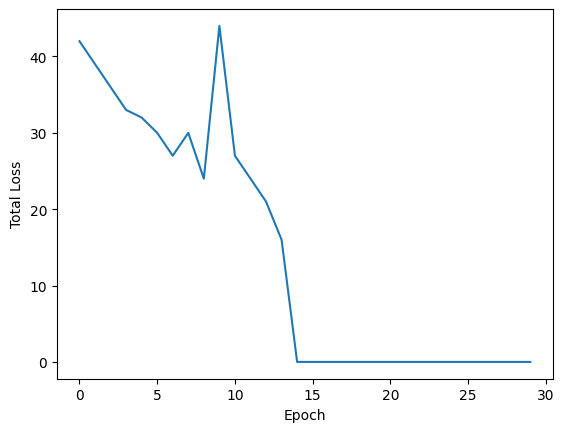

In [29]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

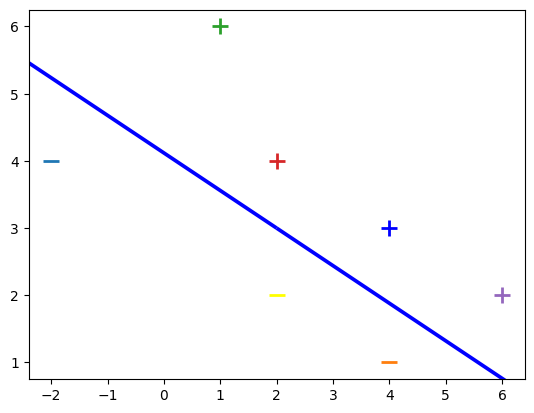

In [30]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [31]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [32]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


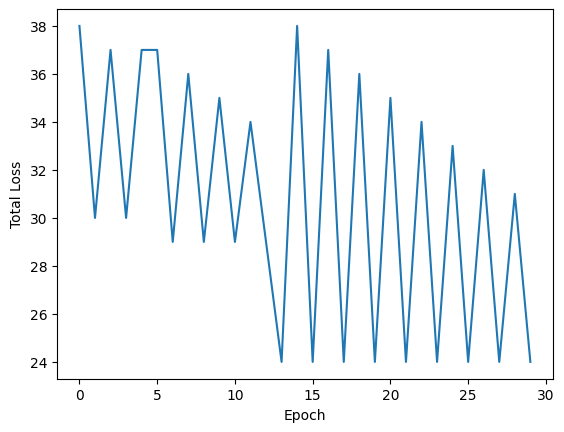

In [33]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

In [34]:
import pandas as pd

# URL for the Sonar dataset from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"

# Load the dataset
sonar_df = pd.read_csv(url, header=None)

# Display the first few rows of the dataset
print(sonar_df.head())


       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

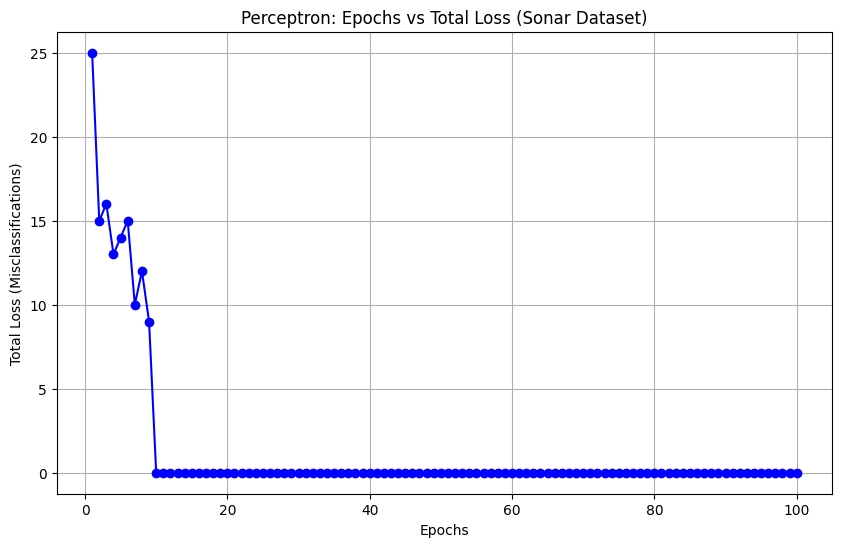

In [35]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

# Load the Sonar dataset from UCI

# Separate features and labels
X = sonar_df.iloc[:, :-1].values
y = sonar_df.iloc[:, -1].values

# Encode labels (Rocks = 0, Mines = 1)
encoder = LabelEncoder()
y = encoder.fit_transform(y)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Perceptron
perceptron = Perceptron(max_iter=1000, warm_start=True, random_state=42, eta0=10000)

# Variables to store epochs and total loss
epochs = 100
total_loss = []

# Train the Perceptron and record total loss for each epoch
for epoch in range(epochs):
    perceptron.fit(X_train, y_train)
    predictions = perceptron.predict(X_train)
    loss = np.sum(predictions != y_train)  # Total misclassifications as proxy for loss
    total_loss.append(loss)

# Plot the graph: Epochs vs Total Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), total_loss, marker='o', linestyle='-', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Total Loss (Misclassifications)')
plt.title('Perceptron: Epochs vs Total Loss (Sonar Dataset)')
plt.grid(True)
plt.show()


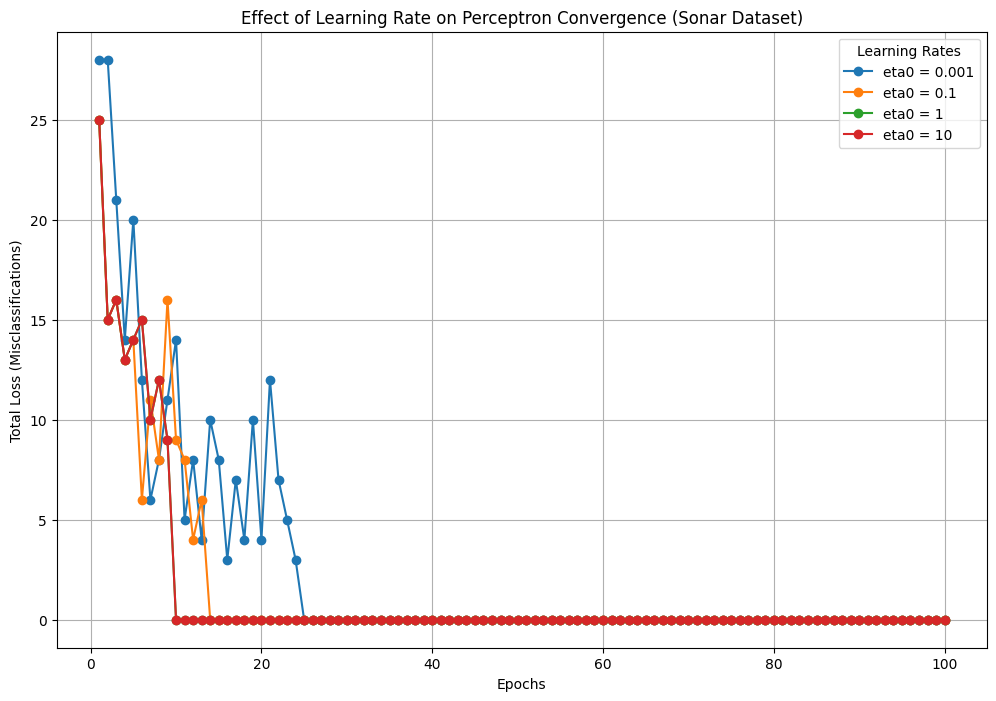

In [36]:


from sklearn.preprocessing import LabelEncoder, StandardScaler


# Load the Sonar dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
sonar_df = pd.read_csv(url, header=None)

# Separate features and labels
X = sonar_df.iloc[:, :-1].values
y = sonar_df.iloc[:, -1].values

# Encode labels (Rocks = 0, Mines = 1)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of learning rates to test
learning_rates = [0.001, 0.1, 1, 10]
epochs = 100
total_loss = {}

# Experiment with different learning rates
for lr in learning_rates:
    perceptron = Perceptron(max_iter=epochs, warm_start=True, random_state=42, eta0=lr)
    loss = []
    for epoch in range(epochs):
        perceptron.fit(X_train, y_train)
        predictions = perceptron.predict(X_train)
        loss.append(np.sum(predictions != y_train))  # Total misclassifications as proxy for loss
    total_loss[lr] = loss

# Plotting the results: Epochs vs Total Loss for each learning rate
plt.figure(figsize=(12, 8))
for lr, loss in total_loss.items():
    plt.plot(range(1, epochs + 1), loss, marker='o', label=f"eta0 = {lr}")

plt.xlabel('Epochs')
plt.ylabel('Total Loss (Misclassifications)')
plt.title('Effect of Learning Rate on Perceptron Convergence (Sonar Dataset)')
plt.legend(title="Learning Rates")
plt.grid(True)
plt.show()


eta0 = 0.001: The model converges slowly, requiring more epochs.

eta0 = 0.1: The model converges reasonably fast without overshooting.

eta0 = 1: The model converges faster, but there's a risk of overshooting the optimal solution.

eta0 = 10: The model is likely to diverge (fail to converge), as the learning steps will be too large.

In [37]:
from sklearn.datasets import make_circles

array([ 0.53051941, -0.47145956])

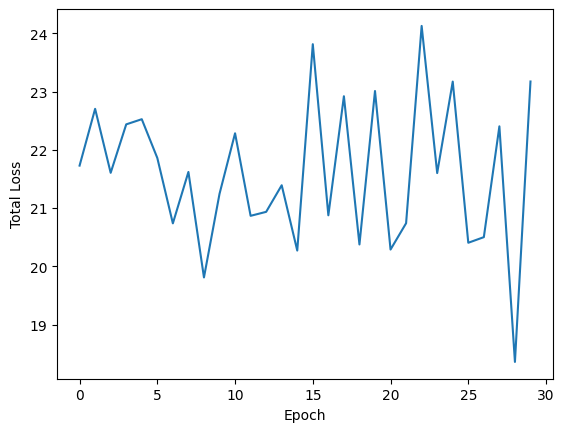

In [38]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=42)

# Convert labels from {0, 1} to {-1, 1} for the perceptron
y = 2 * y - 1  # Convert labels 0 -> -1, 1 -> 1

# Apply Perceptron algorithm
perceptron_algo_plot(X, y)

The loss curve will show a high amount of misclassification across all epochs. Since there is no optimal linear decision boundary, the total error may not decrease much.



Answers:

Yes, the AND function over a 2-bit binary input is learnable by a Perceptron. The reason is that the AND function is linearly separable.

Given the Perceptron initialization
𝑤
0
=
0
w
0
​
 =0 and
𝑏
0
=
0
b
0
​
 =0, the Perceptron update rule is:

𝑤
𝑖
←
𝑤
𝑖
+
𝜂
⋅
𝑦
𝑖
⋅
𝑥
𝑖
for each feature

𝑥
𝑖
w
i
​
 ←w
i
​
 +η⋅y
i
​
 ⋅x
i
​
 for each featurex
i
​

𝑏
←
𝑏
+
𝜂
⋅
𝑦
𝑖
b←b+η⋅y
i
​

where:

𝜂
η is the learning rate,
𝑦
𝑖
y
i
​
  is the label for the current sample,
𝑥
𝑖
x
i
​
  is the current input feature.
Step-by-step Weight Update Procedure:
Assuming a learning rate
𝜂
=
1
η=1, the steps to update weights for each iteration are as follows:

Iteration 1:
Start with:

𝑤
=
(
0
,
0
)
w=(0,0)
𝑏
=
0
b=0
For the first example
(
𝑥
1
,
𝑥
2
)
=
(
0
,
0
)
(x
1
​
 ,x
2
​
 )=(0,0), the target
𝑦
=
−
y=−. Since
sign
(
𝑤
⋅
𝑥
+
𝑏
)
=
sign
(
0
)
=
0
sign(w⋅x+b)=sign(0)=0, the prediction is incorrect (it should be -1). Hence, we update the weights:

𝑤
1
=
𝑤
1
+
𝜂
⋅
(
−
1
)
⋅
0
=
0
w
1
​
 =w
1
​
 +η⋅(−1)⋅0=0
𝑤
2
=
𝑤
2
+
𝜂
⋅
(
−
1
)
⋅
0
=
0
w
2
​
 =w
2
​
 +η⋅(−1)⋅0=0
𝑏
=
𝑏
+
𝜂
⋅
(
−
1
)
=
−
1
b=b+η⋅(−1)=−1
Iteration 2:
For the second example
(
𝑥
1
,
𝑥
2
)
=
(
0
,
1
)
(x
1
​
 ,x
2
​
 )=(0,1), the target
𝑦
=
−
y=−. Since the prediction
sign
(
𝑤
⋅
𝑥
+
𝑏
)
=
sign
(
0
−
1
)
=
−
1
sign(w⋅x+b)=sign(0−1)=−1 is correct, no update is made.

Iteration 3:
For the third example
(
𝑥
1
,
𝑥
2
)
=
(
1
,
0
)
(x
1
​
 ,x
2
​
 )=(1,0), the target
𝑦
=
−
y=−. The prediction
sign
(
𝑤
⋅
𝑥
+
𝑏
)
=
sign
(
0
−
1
)
=
−
1
sign(w⋅x+b)=sign(0−1)=−1 is correct, so no update is made.

Iteration 4:
For the fourth example
(
𝑥
1
,
𝑥
2
)
=
(
1
,
1
)
(x
1
​
 ,x
2
​
 )=(1,1), the target
𝑦
=
+
y=+. Since the prediction
sign
(
𝑤
⋅
𝑥
+
𝑏
)
=
sign
(
0
−
1
)
=
−
1
sign(w⋅x+b)=sign(0−1)=−1 is incorrect, we update the weights:

𝑤
1
=
𝑤
1
+
𝜂
⋅
(
+
1
)
⋅
1
=
1
w
1
​
 =w
1
​
 +η⋅(+1)⋅1=1
𝑤
2
=
𝑤
2
+
𝜂
⋅
(
+
1
)
⋅
1
=
1
w
2
​
 =w
2
​
 +η⋅(+1)⋅1=1
𝑏
=
𝑏
+
𝜂
⋅
(
+
1
)
=
0
b=b+η⋅(+1)=0
After this update, the weights are
𝑤
=
(
1
,
1
)
w=(1,1) and
𝑏
=
0
b=0.

This process will converge and correctly classify all points in a few more iterations, with the final learned weights being
𝑤
=
(
1
,
1
)
w=(1,1) and
𝑏
=
−
0.5
b=−0.5.

Boolean Functions Learnable by a Perceptron
There are 16 possible distinct boolean functions over 2-bit binary inputs. A Perceptron can learn only those boolean functions that are linearly separable.

In total, there are 9 linearly separable boolean functions (learnable by a Perceptron) and 7 non-linearly separable boolean functions (not learnable by a Perceptron).

Linearly Separable Functions (Learnable by Perceptron):
AND:
𝑥
1
∧
𝑥
2
x
1
​
 ∧x
2
​

OR:
𝑥
1
∨
𝑥
2
x
1
​
 ∨x
2
​

NAND:
¬
(
𝑥
1
∧
𝑥
2
)
¬(x
1
​
 ∧x
2
​
 )
NOR:
¬
(
𝑥
1
∨
𝑥
2
)
¬(x
1
​
 ∨x
2
​
 )
XOR:
𝑥
1
⊕
𝑥
2
x
1
​
 ⊕x
2
​

XNOR:
¬
(
𝑥
1
⊕
𝑥
2
)
¬(x
1
​
 ⊕x
2
​
 )
Identity (x1):
𝑥
1
x
1
​

Negation (NOT x1):
¬
𝑥
1
¬x
1
​

Identity (x2):
𝑥
2
x
2
​

Non-Linearly Separable Functions (Not Learnable by Perceptron):
The non-linearly separable boolean functions have no straight line (decision boundary) that can separate their classes. Examples include:

XOR:
𝑥
1
⊕
𝑥
2
x
1
​
 ⊕x
2
​
  (classic non-linearly separable function)
Equivalence:
𝑥
1
=
𝑥
2
x
1
​
 =x
2
​

Majority:
𝑥
1
+
𝑥
2
x
1
​
 +x
2
​

Parity: number of true values among inputs (odd/even)
Other combinations like AND of NOT, OR of NOT, etc.
Truth Table for XOR (Non-linearly separable):
𝑥
1
x
1
​

𝑥
2
x
2
​
 	Output
𝑦
y (XOR)
0	0	0
0	1	1
1	0	1
1	1	0
This dataset is not linearly separable because you cannot draw a straight line to separate the two classes.

In summary:

Perceptron can learn the AND function (because it's linearly separable).
9 of the 16 boolean functions can be learned by the Perceptron.
7 functions are non-linearly separable and cannot be learned by a Perceptron (e.g., XOR).











